# Schizophrenia

## Libraries

In [ ]:
pip install scispacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 778.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 9.8 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578479 sha256=1c1f069f3f1de2826c43076ece0c9a98c1172340187c2649f8d142bed4edfc10
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [ ]:
!pip install biopython pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 46.2 MB/s eta 0:00:00


In [ ]:
import time

import pandas as pd

import re

from google.colab import files

import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from Bio import Entrez, Medline

from wordcloud import WordCloud, STOPWORDS

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import Phrases
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from pprint import pprint

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('punkt')
nltk.download('wordnet')

import spacy
import scispacy
from scispacy.linking import EntityLinker

from Bio.KEGG import REST
from Bio.KEGG import Gene

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Mental health dataset

In this part of notebook we downloaded from Kaggle the dataset: https://www.kaggle.com/datasets/imtkaggleteam/mental-health

In [ ]:
from google.colab import files
files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliatsymbal","key":"8befac4febf39ead0032676df60ebbbe"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!kaggle datasets download -d imtkaggleteam/mental-health

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/mental-health
License(s): other
  0% 0.00/338k [00:00<?, ?B/s]
100% 338k/338k [00:00<00:00, 109MB/s]


In [ ]:
!unzip mental-health.zip

Archive:  mental-health.zip
  inflating: 1- mental-illnesses-prevalence.csv  
  inflating: 2- burden-disease-from-each-mental-illness(1).csv  
  inflating: 3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv  
  inflating: 4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv  
  inflating: 5- anxiety-disorders-treatment-gap.csv  
  inflating: 6- depressive-symptoms-across-us-population.csv  
  inflating: 7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv("/content/1- mental-illnesses-prevalence.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.columns = ['Country', 'CountryCode', 'Year', 'SchizophreniaRate', 'Depressive disorders', 'Anxiety', 'Bipolar disorders', 'Eating disorders']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country CountryCode  Year  SchizophreniaRate  Depressive disorders  \
0  Afghanistan         AFG  1990           0.223206              4.996118   
1  Afghanistan         AFG  1991           0.222454              4.989290   
2  Afghanistan         AFG  1992           0.221751              4.981346   
3  Afghanistan         AFG  1993           0.220987              4.976958   
4  Afghanistan         AFG  1994           0.220183              4.977782   

    Anxiety  Bipolar disorders  Eating disorders  
0  4.713314           0.703023          0.127700  
1  4.702100           0.702069          0.123256  
2  4.683743           0.700792          0.118844  
3  4.673549           0.700087          0.115089  
4  4.670810           0.699898          0.111815

In [ ]:
# columns_of_interest = ['Entity', 'Code', 'Year', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized']
# df_schizophrenia = df[columns_of_interest]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# df_schizophrenia.columns = ['Country', 'CountryCode', 'Year', 'SchizophreniaRate']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## EDA

### Here we can see top 10 countries with highest and lowest Schizophrenia Rate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


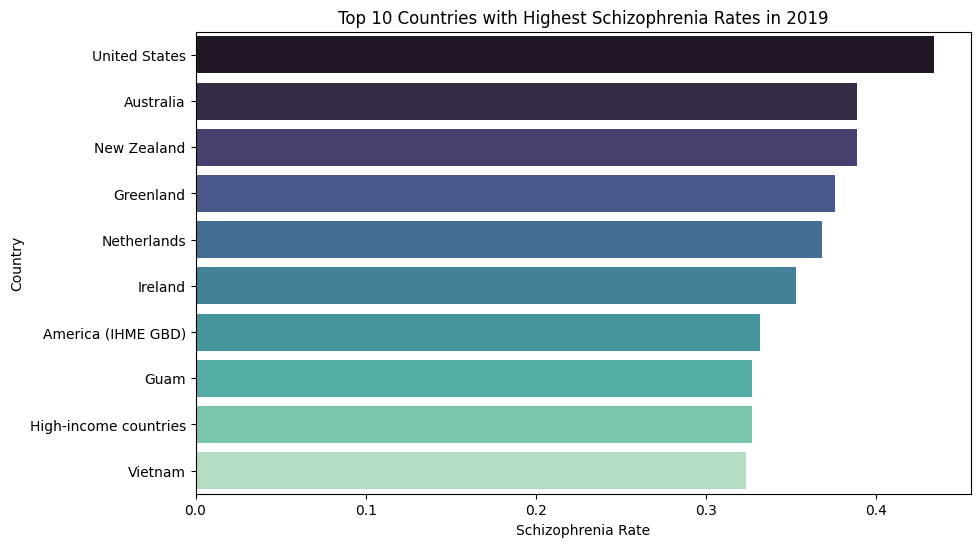

In [ ]:
year = 2019
df_year = df[df['Year'] == year]
top_countries = df_year.sort_values(by='SchizophreniaRate', ascending=False).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='SchizophreniaRate',
    y='Country',
    hue='Country',
    data=top_countries,
    palette='mako',
    legend=False
)
plt.title(f'Top 10 Countries with Highest Schizophrenia Rates in {year}')
plt.xlabel('Schizophrenia Rate')
plt.ylabel('Country')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


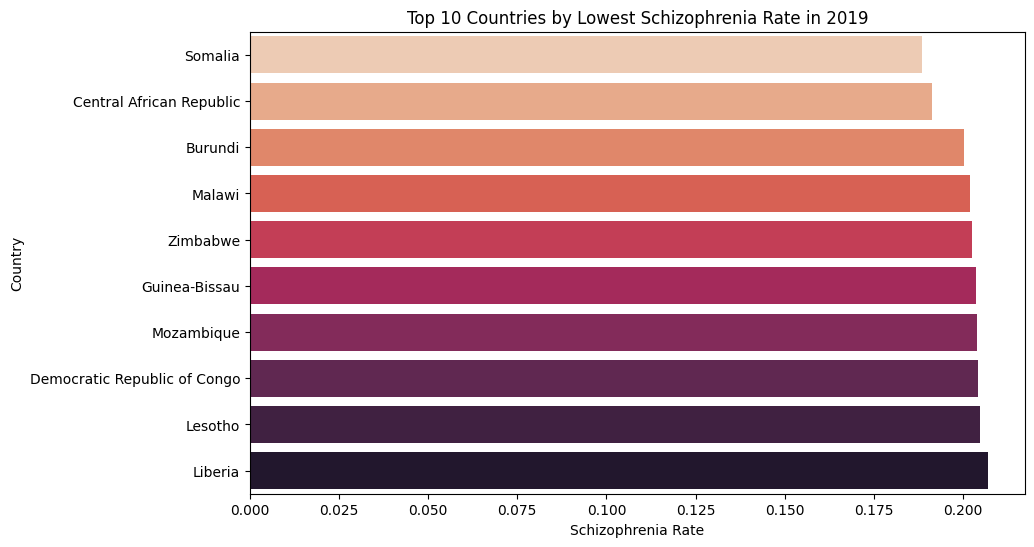

In [ ]:
nottop_countries = df_year.sort_values(by='SchizophreniaRate', ascending=True).head(10)
plt.figure(figsize=(10, 6))

sns.barplot(
    x='SchizophreniaRate',
    y='Country',
    hue='Country',
    data=nottop_countries,
    palette='rocket_r',
    legend=False
)
plt.title(f'Top 10 Countries by Lowest Schizophrenia Rate in {year}')
plt.xlabel('Schizophrenia Rate')
plt.ylabel('Country')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


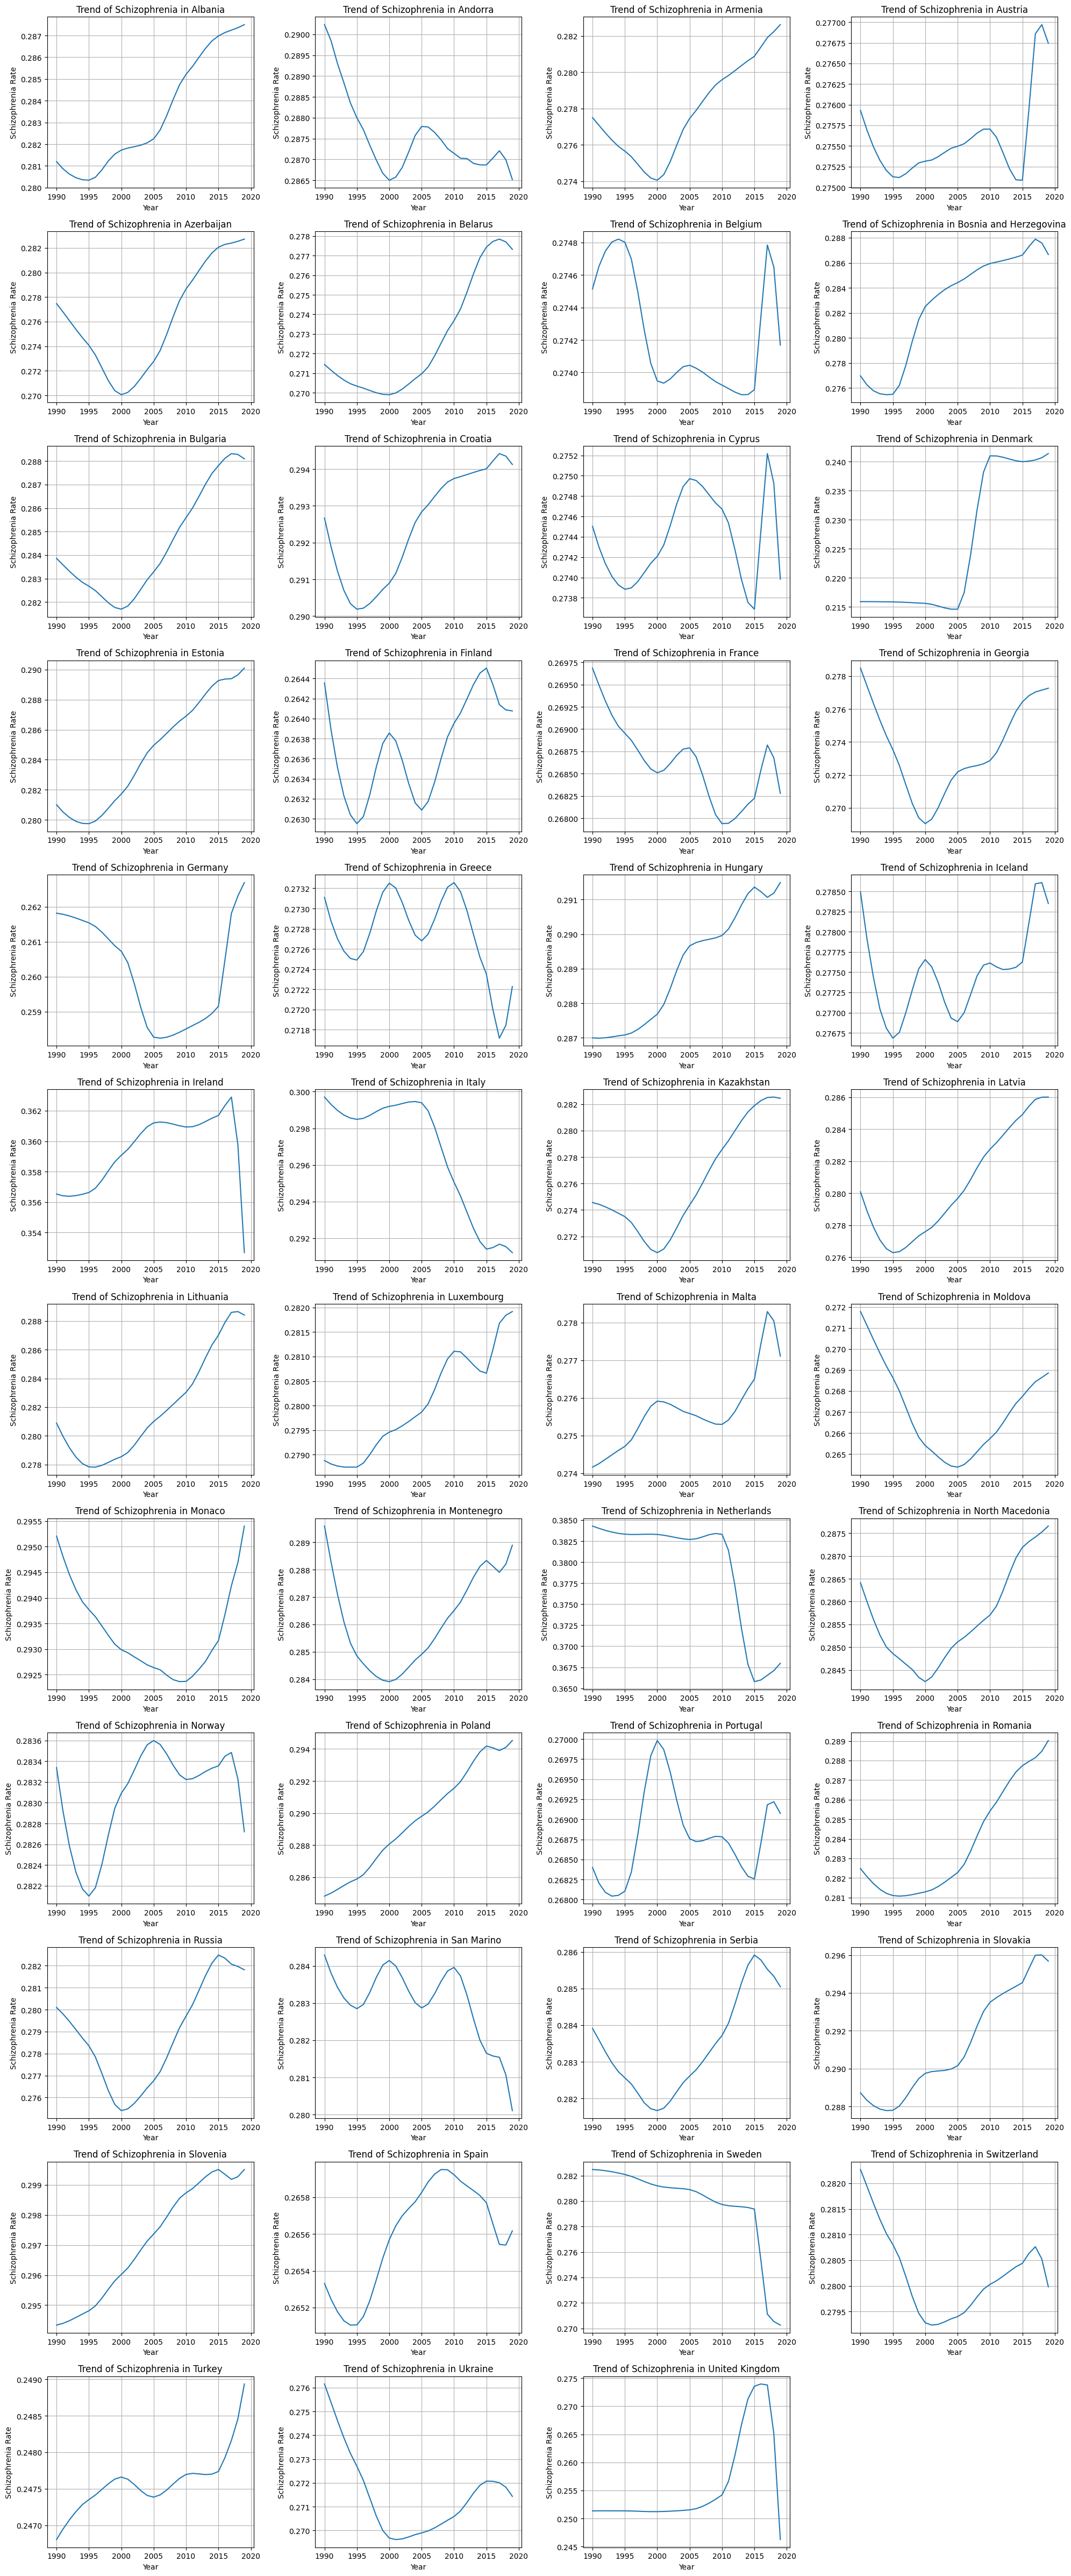

In [ ]:
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
    'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
    'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
    'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]

df_europe = df[df['Country'].isin(european_countries)]

countries = df_europe['Country'].unique()
num_countries = len(countries)
num_cols = 4
num_rows = (num_countries + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

for i, country in enumerate(countries, 1):
    df_country = df_europe[df_europe['Country'] == country]
    plt.subplot(num_rows, num_cols, i)
    sns.lineplot(x='Year', y='SchizophreniaRate', data=df_country)
    plt.title(f'Trend of Schizophrenia in {country}')
    plt.xlabel('Year')
    plt.ylabel('Schizophrenia Rate')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Summary statistics

In [ ]:
df['SchizophreniaRate'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    6420.000000
mean        0.266604
std         0.039383
min         0.188416
25%         0.242267
50%         0.273477
75%         0.286575
max         0.462045
Name: SchizophreniaRate, dtype: float64

In [ ]:
df.groupby(['Country'])['SchizophreniaRate'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count      mean       std       min       25%       50%  \
Country                                                                       
Afghanistan          30.0  0.217139  0.002656  0.214061  0.214705  0.217048   
Africa (IHME GBD)    30.0  0.219843  0.000584  0.218995  0.219516  0.219807   
Albania              30.0  0.283351  0.002588  0.280343  0.281205  0.282154   
Algeria              30.0  0.249057  0.000408  0.248257  0.248892  0.249017   
America (IHME GBD)   30.0  0.341972  0.004466  0.331556  0.341314  0.343781   
...                   ...       ...       ...       ...       ...       ...   
Vietnam              30.0  0.314578  0.004943  0.306511  0.310514  0.314632   
World                30.0  0.288877  0.000699  0.287409  0.288479  0.288646   
Yemen                30.0  0.230986  0.001601  0.225680  0.230936  0.231670   
Zambia               30.0  0.209079  0.001773  0.206795  0.207833  0.208650   
Zimbabwe             30.0  0.204477  0.003018  0.200450  0.201399  0.204898   

                         75%       max  
Country                                 
Afghanistan         0.218260  0.223206  
Africa (IHME GBD)   0.220077  0.221209  
Albania             0.285893  0.287501  
Algeria             0.249279  0.250219  
America (IHME GBD)  0.344714  0.345895  
...                      ...       ...  
Vietnam             0.318117  0.323551  
World               0.289314  0.290107  
Yemen               0.231791  0.232227  
Zambia              0.210064  0.212869  
Zimbabwe            0.207544  0.207998  

[214 rows x 8 columns]

### Let us see the correlation between Schizophrenia Rate and others disorders

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


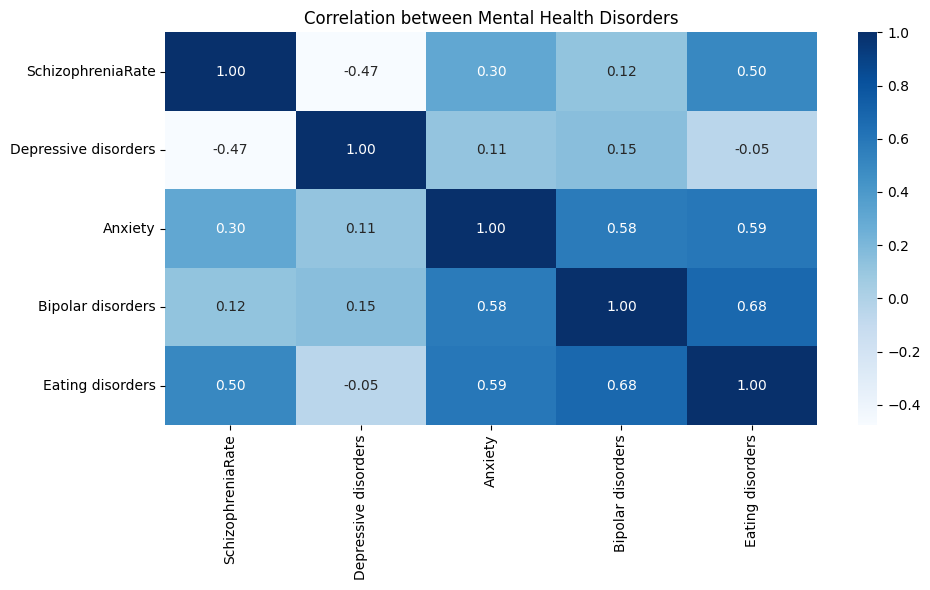

In [ ]:
columns_for_correlation = ['SchizophreniaRate', 'Depressive disorders', 'Anxiety', 'Bipolar disorders', 'Eating disorders']
correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation between Mental Health Disorders')
plt.tight_layout()
plt.show()


# Literature analysis

In [ ]:
Entrez.email = "p.cavana1@campus.unimib.it"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. **Search for Publications on PubMed**:
The function `search_publications(term, retmax=20000)` uses the `Entrez.esearch` method from the BioPython library to search PubMed for articles matching the search term and then returns a list of PubMed IDs (PMIDs) for the articles that match the search term.
   
2. **Fetch Detailed Information for Each Publication**:
The function `fetch_details(id_list)` takes a list of PubMed IDs (`id_list`) and retrieves detailed information for each article using the `Entrez.efetch` method. It retrieves data in XML format and parses it to return detailed records.
   
3. **Main Script**:
We sets the search term to "schizophrenia[Title]". Retrieve IDs calls `search_publications` to get a list of PubMed IDs for articles with "schizophrenia" in the title. The **Batch Processing** processes the IDs in batches of 200 to avoid overwhelming the PubMed server.
For each article, we extract the publication year, title, and abstract. Then add these details to a list called `publications` in the form of dictionaries containing `PMID`, `Title`, `Year`, and `Abstract`.

4. **Create a DataFrame**:
We convert the list of dictionaries `publications` into a pandas DataFrame for easier manipulation and analysis.

5. **Analyze and Plot the Data**: We show the distribution of these publications over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       PMID                                              Title  Year  \
0  38834855  Abnormal trial-to-trial variability in P300 ti...  2024   
1  38834330  Group arts therapies for patients with schizop...  2024   
2  38834945  Correction: Are the sensorimotor control capab...  2024   
3  38833151  The relationship between schizophrenia or schi...  2024   
4  38832962  Altered temporal lobe connectivity is associat...  2024   

                                            Abstract  
0  Cognitive disturbance in identifying, processi...  
1  Schizophrenia, a chronic mental problem, signi...  
2                                                     
3  Both schizophrenia and type 1 diabetes mellitu...  
4  Research on individuals with a younger onset a...  


<ipython-input-4-7bd764fa4f7d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='Blues_d')


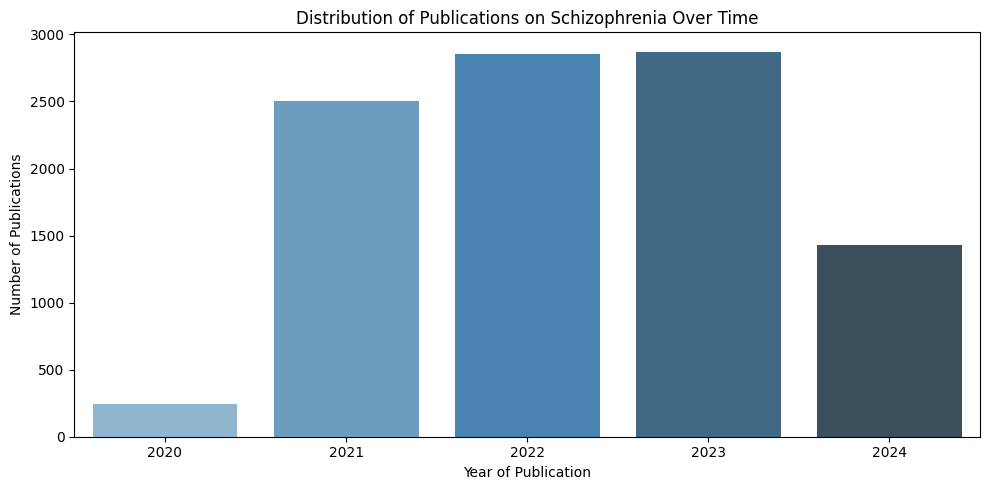

In [ ]:
def search_publications(term, retmax=20000):
    handle = Entrez.esearch(db="pubmed", term=term, usehistory="y", retmax=retmax)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def fetch_details(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)
    handle.close()
    return records

search_term = "schizophrenia[Title]"
id_list = search_publications(search_term)

batch_size = 200
publications = []

for start in range(0, len(id_list), batch_size):
    end = min(start + batch_size, len(id_list))
    batch_ids = id_list[start:end]
    records = fetch_details(batch_ids)

    for record in records['PubmedArticle']:
        try:
            pub_date = record['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']
            year = pub_date.get('Year', None)
            title = record['MedlineCitation']['Article']['ArticleTitle']
            abstract = record['MedlineCitation']['Article'].get('Abstract', {}).get('AbstractText', [''])[0]
            pub_id = record['MedlineCitation']['PMID']
            if year:
                publications.append({'PMID': pub_id, 'Title': title, 'Year': year, 'Abstract': abstract})
        except KeyError:
            continue
    time.sleep(0.5)

df = pd.DataFrame(publications)
print(df.head())

year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='Blues_d')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
plt.title('Distribution of Publications on Schizophrenia Over Time')
plt.tight_layout()
plt.show()

**Generate word cloud for titles**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


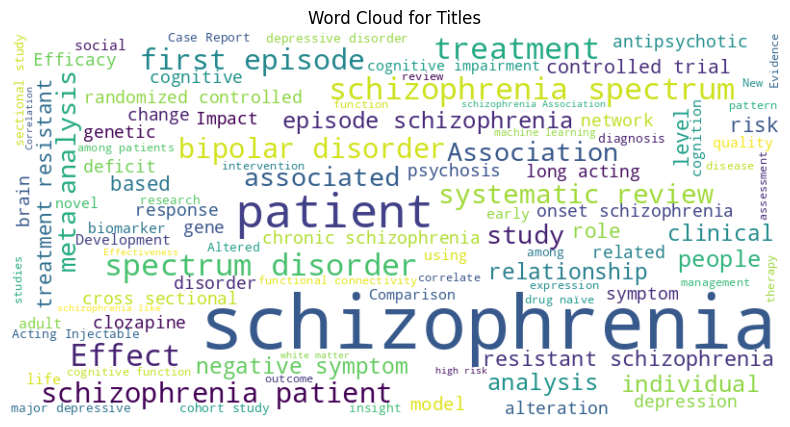

In [ ]:
title_text = ' '.join(df['Title'])
title_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100).generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

**Generate word cloud for abstract**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


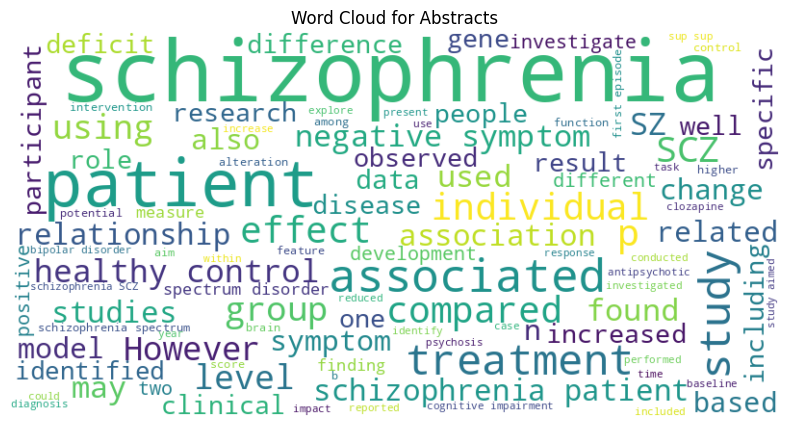

In [ ]:
abstract_text = ' '.join(df['Abstract'])
abstract_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100).generate(abstract_text)

plt.figure(figsize=(10, 5))
plt.imshow(abstract_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Abstracts')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       PMID                                              Title  Year  \
0  38834873  The clinical course of individuals with 22q11....  2024   
1  38834855  Abnormal trial-to-trial variability in P300 ti...  2024   
2  38834668  Psychiatric adverse events following COVID-19 ...  2024   
3  38834330  Group arts therapies for patients with schizop...  2024   
4  38833935  The role of recurrent trauma on post-traumatic...  2024   

                                            Abstract  
0  This retrospective study aims to investigate t...  
1  Cognitive disturbance in identifying, processi...  
2  Evidence has suggested an increased risk of ps...  
3  Schizophrenia, a chronic mental problem, signi...  
4  Comorbidity between post-traumatic stress diso...  


<ipython-input-5-4e99e4028b65>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='Blues_d')


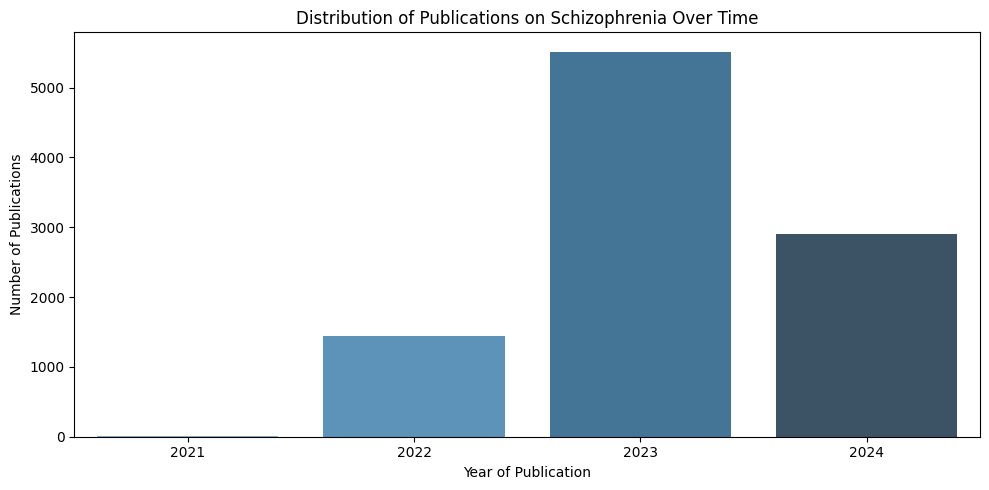

In [ ]:
def search_publications(term, retmax=20000):
    handle = Entrez.esearch(db="pubmed", term=term, usehistory="y", retmax=retmax)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def fetch_details(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)
    handle.close()
    return records

search_term = "schizophrenia"
id_list = search_publications(search_term)

batch_size = 200
publications = []

for start in range(0, len(id_list), batch_size):
    end = min(start + batch_size, len(id_list))
    batch_ids = id_list[start:end]
    records = fetch_details(batch_ids)

    for record in records['PubmedArticle']:
        try:
            pub_date = record['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']
            year = pub_date.get('Year', None)
            title = record['MedlineCitation']['Article']['ArticleTitle']
            abstract = record['MedlineCitation']['Article'].get('Abstract', {}).get('AbstractText', [''])[0]
            pub_id = record['MedlineCitation']['PMID']
            if year:
                publications.append({'PMID': pub_id, 'Title': title, 'Year': year, 'Abstract': abstract})
        except KeyError:
            continue
    time.sleep(0.5)

df = pd.DataFrame(publications)
print(df.head())

year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='Blues_d')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
plt.title('Distribution of Publications on Schizophrenia Over Time')
plt.tight_layout()
plt.show()

In [ ]:
nlp = spacy.load("en_core_web_sm")

def search_publications(term, retmax=20000):
    handle = Entrez.esearch(db="pubmed", term=term, usehistory="y", retmax=retmax)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def fetch_details(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)
    handle.close()
    return records

search_term = "schizophrenia"
id_list = search_publications(search_term)

batch_size = 200
publications = []

for start in range(0, len(id_list), batch_size):
    end = min(start + batch_size, len(id_list))
    batch_ids = id_list[start:end]
    records = fetch_details(batch_ids)

    for record in records['PubmedArticle']:
        try:
            pub_date = record['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']
            year = pub_date.get('Year', None)
            title = record['MedlineCitation']['Article']['ArticleTitle']
            abstract = record['MedlineCitation']['Article'].get('Abstract', {}).get('AbstractText', [''])[0]
            pub_id = record['MedlineCitation']['PMID']
            if year:
                publications.append({'PMID': pub_id, 'Title': title, 'Year': year, 'Abstract': abstract})
        except KeyError:
            continue
    time.sleep(0.5)

df = pd.DataFrame(publications)

# NLP to find specific animals mentioned
#animal_terms = ["rat", "mouse", "dog", "monkey", "cat", "pig", "sheep", "cow",  "gorilla", "orangutan", "bee", "butterfly", "lizard", "snake", "chimp", "chimpanzee", "elephant", " dolphin", "whale", "hippopotamus", "bear", "tiger", "shark"]
animal_terms = [
    "rat", "rats", "mouse", "mice", "dog", "dogs", "monkey", "monkeys",
    "cat", "cats", "pig", "pigs", "sheep", "cow", "cows", "gorilla", "gorillas",
    "orangutan", "orangutans", "bee", "bees", "butterfly", "butterflies", "lizard", "lizards", "snake", "snakes", "chimp", "chimps",
    "chimpanzee", "chimpanzees", "elephant", "elephants", "dolphin", "dolphins",
    "whale", "whales", "hippopotamus", "hippopotamuses", "bear", "bears",
    "tiger", "tigers", "shark", "sharks", "fish", "fishes"
]

def find_animals(text):
    found_animals = set()
    text_lower = text.lower()
    for animal in animal_terms:
        # Assicura di cercare solo parole intere
        pattern = r'\b' + re.escape(animal) + r'\b'
        if re.search(pattern, text_lower):
            found_animals.add(animal)
    return list(found_animals)

df['Animals_in_Title'] = df['Title'].apply(find_animals)
df['Animals_in_Abstract'] = df['Abstract'].apply(find_animals)

# Unisce le liste degli animali trovati in titoli e abstract per avere un'unica lista per articolo
df['Animals'] = df.apply(lambda x: list(set(x['Animals_in_Title'] + x['Animals_in_Abstract'])), axis=1)

print(df.head())

animal_counts = df['Animals'].explode().value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=animal_counts.index, y=animal_counts.values, palette='Blues_d')
plt.xlabel('Animal')
plt.ylabel('Number of Publications')
plt.title('Frequency of Animal Mentioned in Schizophrenia Research')
plt.tight_layout()
plt.show()



In [ ]:
# Mapping da singolare a plurale
animal_mapping = {
    "rat": "rats", "mouse": "mice", "dog": "dogs", "monkey": "monkeys",
    "cat": "cats", "pig": "pigs", "sheep": "sheep", "cow": "cows",
    "gorilla": "gorillas", "orangutan": "orangutans", "bee": "bees",
    "butterfly": "butterflies", "lizard": "lizards",
    "snake": "snakes", "chimp": "chimps", "chimpanzee": "chimps",
    "elephant": "elephants", "dolphin": "dolphins", "whale": "whales",
    "hippopotamus": "hippopotamuses", "bear": "bears", "tiger": "tigers",
    "shark": "sharks", "fish": "fishes"
}

def normalize_animals(animals):
    return [animal_mapping.get(animal, animal) for animal in animals]

df['Normalized_Animals'] = df['Animals'].apply(normalize_animals)

normalized_animal_counts = df['Normalized_Animals'].explode().value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=normalized_animal_counts.index, y=normalized_animal_counts.values, palette='Blues_d')
plt.xlabel('Animal')
plt.ylabel('Number of Publications')
plt.title('Frequency of Animal Mentioned in Schizophrenia Research (Aggregated)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Frequency of Animal Mentioned in Schizophrenia Research (Aggregated):")
for animal, count in normalized_animal_counts.items():
    print(f"{animal}: {count}")

In [ ]:
# Dizionario per mappare animali singolari a plurali
animal_mapping = {
    "rat": "rats", "rats": "rats",
    "mouse": "mice", "mice": "mice",
    "dog": "dogs", "dogs": "dogs",
    "monkey": "monkeys", "monkeys": "monkeys",
    "cat": "cats", "cats": "cats",
    "pig": "pigs", "pigs": "pigs",
    "sheep": "sheep", "sheep": "sheep",
    "cow": "cows", "cows": "cows",
    "gorilla": "gorillas", "gorillas": "gorillas",
    "orangutan": "orangutans", "orangutans": "orangutans",
    "bee": "bees", "bees": "bees",
    "butterfly": "butterflies", "butterflies": "butterflies",
    "lizard": "lizards", "lizards": "lizards",
    "snake": "snakes", "snakes": "snakes",
    "chimp": "chimps", "chimpanzee": "chimps", "chimpanzees": "chimps",
    "elephant": "elephants", "elephants": "elephants",
    "dolphin": "dolphins", "dolphins": "dolphins",
    "whale": "whales", "whales": "whales",
    "hippopotamus": "hippopotamuses", "hippopotamuses": "hippopotamuses",
    "bear": "bears", "bears": "bears",
    "tiger": "tigers", "tigers": "tigers",
    "shark": "sharks", "sharks": "sharks", "fish": "fish", "fishes": "fishes"
}

# Animal counts for top 5
animal_counts = df['Animals'].explode().map(animal_mapping).value_counts()
top_5_animals = animal_counts.nlargest(5).index.tolist()
print("Top 5 Animals:", top_5_animals)

def animal_in_text(text, animal):
    pattern = r'\b' + re.escape(animal) + r'\b'
    return re.search(pattern, text.lower()) is not None

top_5_animal_articles = {animal: [] for animal in top_5_animals}

for animal in top_5_animals:
    filtered_articles = df[df.apply(lambda x: animal_in_text(x['Title'], animal) or animal_in_text(x['Abstract'], animal), axis=1)]
    example_titles = filtered_articles[['Title', 'Abstract']].head(5).values.tolist()
    top_5_animal_articles[animal] = example_titles

for animal, articles in top_5_animal_articles.items():
    print(f"\nTop 5 Articles mentioning {animal} in Title or Abstract:")
    if articles:
        for index, (title, abstract) in enumerate(articles):
            print(f"{index + 1}. Title: {title}\n   Abstract: {abstract}\n")
    else:
        print("No articles found with this animal mentioned in the title or abstract.")

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz

In [ ]:
nlp = spacy.load("en_ner_bionlp13cg_md")

def extract_mentions_context(df, animal_list):
    """ Estrae e restituisce il contesto delle menzioni degli animali specificati. """
    animal_contexts = {animal: [] for animal in animal_list}

    for index, row in df.iterrows():
        text = str(row['Abstract'])
        doc = nlp(text)
        for sent in doc.sents:
            for animal in animal_list:
                if animal in sent.text.lower():
                    animal_contexts[animal].append(sent.text)

    return animal_contexts

filtered_df = df[df['Animals'].apply(lambda animals: any(animal in top_5_animals for animal in animals))]
animal_contexts = extract_mentions_context(filtered_df, top_5_animals)

for animal, contexts in animal_contexts.items():
    print(f"\nContext for {animal}:")
    for context in contexts:
        print(f"- {context}")


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1000000
def summarize_text(texts, num_sentences=3):
    text = " ".join(texts)
    doc = nlp(text)
    word_frequencies = {}
    for word in doc:
        if word.text.lower() not in STOP_WORDS and word.is_alpha:
            word_frequencies[word.text] = word_frequencies.get(word.text, 0) + 1

    max_frequency = max(word_frequencies.values(), default=1)
    for word in word_frequencies:
        word_frequencies[word] /= max_frequency

    sentence_scores = {}
    for sent in doc.sents:
        for word in sent:
            if word.text in word_frequencies:
                sentence_scores[sent] = sentence_scores.get(sent, 0) + word_frequencies[word.text]

    summarized_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    return " ".join([sent.text for sent in summarized_sentences])

animal_summaries = {animal: summarize_text(contexts) for animal, contexts in animal_contexts.items()}

for animal, summary in animal_summaries.items():
    print(f"Summary for {animal}:\n{summary}\n")


# Topic Modeling

In [ ]:
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving en_core_sci_sm-0.5.4.tar.gz to en_core_sci_sm-0.5.4.tar.gz


In [ ]:
import tarfile
import os

tar_path = '/content/en_core_sci_sm-0.5.4.tar.gz'

extract_folder = 'en_core_sci_sm'

with tarfile.open(tar_path, 'r') as tar:
    tar.extractall(path=extract_folder)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nlp = spacy.load("/content/en_core_sci_sm/en_core_sci_sm-0.5.4/en_core_sci_sm/en_core_sci_sm-0.5.4")

def replace_short_forms(text):
    text = re.sub(r'\b(scz|sz)\b', 'schizophrenia', text, flags=re.IGNORECASE)
    return text

def preprocess_abstracts(abstracts):
    stop_words = set(stopwords.words('english'))
    tokenized_abstracts = []

    for abstract in abstracts:
        abstract = replace_short_forms(abstract)
        doc = nlp(abstract.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
        tokenized_abstracts.append(tokens)

    return tokenized_abstracts

tokenized_abstracts = preprocess_abstracts(df['Abstract'])

bigram = Phrases(tokenized_abstracts, min_count=5, threshold=100)
trigram = Phrases(bigram[tokenized_abstracts], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

tokenized_abstracts = [bigram_mod[doc] for doc in tokenized_abstracts]
tokenized_abstracts = [trigram_mod[doc] for doc in tokenized_abstracts]

dictionary = corpora.Dictionary(tokenized_abstracts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(abstract) for abstract in tokenized_abstracts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [ ]:
lda_model_3 = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=50, workers=2)

for idx, topic in lda_model_3.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

coherencemodel_cv = CoherenceModel(model=lda_model_3, texts=tokenized_abstracts, dictionary=dictionary, coherence='c_v')
coherence_score_cv = coherencemodel_cv.get_coherence()
print(f'Coherence Score (c_v): {coherence_score_cv}')

coherencemodel_umass = CoherenceModel(model=lda_model_3, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence_score_umass = coherencemodel_umass.get_coherence()
print(f'Coherence Score (u_mass): {coherence_score_umass}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.047*"patient" + 0.026*"symptom" + 0.019*"cognitive" + 0.019*"negative" + 0.017*"group" + 0.015*"score" + 0.015*"level" + 0.013*"control" + 0.012*"positive" + 0.011*"function"
Topic: 1 
Words: 0.021*"model" + 0.016*"cognitive" + 0.015*"deficit" + 0.015*"effect" + 0.014*"mouse" + 0.013*"symptom" + 0.012*"treatment" + 0.010*"rat" + 0.010*"activity" + 0.010*"increase"
Topic: 2 
Words: 0.032*"brain" + 0.026*"network" + 0.025*"patient" + 0.018*"connectivity" + 0.018*"functional" + 0.017*"use" + 0.014*"region" + 0.011*"analysis" + 0.011*"feature" + 0.010*"healthy"
Topic: 3 
Words: 0.034*"patient" + 0.016*"health" + 0.015*"risk" + 0.012*"use" + 0.011*"mental" + 0.011*"among" + 0.011*"factor" + 0.010*"high" + 0.010*"intervention" + 0.010*"care"
Topic: 4 
Words: 0.015*"social" + 0.014*"disorder" + 0.013*"symptom" + 0.012*"research" + 0.011*"clinical" + 0.009*"mental" + 0.008*"review" + 0.007*"people" + 0.007*"treatment" + 0.006*"use"
Topic: 5 
Words: 0.020*"level" + 0.015*"bra

In [ ]:
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model_3, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values = []
model_list = []
num_topics_range = range(5, 15)

for num_topics in num_topics_range:
    print(f"num_topics: {num_topics}")
    model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=30, workers=2)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=tokenized_abstracts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

for num_topics, coherence in zip(num_topics_range, coherence_values):
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence}')

num_topics: 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 6
num_topics: 7
num_topics: 8
num_topics: 9
num_topics: 10
num_topics: 11
num_topics: 12
num_topics: 13
num_topics: 14
Num Topics: 5, Coherence Score: 0.4594818339616026
Num Topics: 6, Coherence Score: 0.4483883768985936
Num Topics: 7, Coherence Score: 0.454101585618509
Num Topics: 8, Coherence Score: 0.49332368520534087
Num Topics: 9, Coherence Score: 0.4787189083009343
Num Topics: 10, Coherence Score: 0.4969482691044325
Num Topics: 11, Coherence Score: 0.49016605228083665
Num Topics: 12, Coherence Score: 0.4901982253363781
Num Topics: 13, Coherence Score: 0.4792958068486616
Num Topics: 14, Coherence Score: 0.47649883771642754


without bigrams and trigrams

In [ ]:
lemmatizer = WordNetLemmatizer()
tokenized_abstracts = []

for abstract in df['Abstract']:
    tokens = word_tokenize(abstract.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokenized_abstracts.append(tokens)

stop_words = set(stopwords.words('english'))
tokenized_abstracts = [[word for word in abstract if word not in stop_words] for abstract in tokenized_abstracts]

dictionary = corpora.Dictionary(tokenized_abstracts)
corpus = [dictionary.doc2bow(abstract) for abstract in tokenized_abstracts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=11, id2word=dictionary, passes=50, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

document_topics = [lda_model.get_document_topics(abstract) for abstract in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.036*"patient" + 0.027*"p" + 0.026*"wa" + 0.024*"schizophrenia" + 0.016*"level" + 0.015*"study" + 0.015*"group" + 0.014*"symptom" + 0.013*"score" + 0.009*"negative"
Topic: 1 
Words: 0.026*"schizophrenia" + 0.020*"patient" + 0.018*"brain" + 0.014*"network" + 0.012*"control" + 0.011*"functional" + 0.010*"sz" + 0.010*"study" + 0.009*"connectivity" + 0.009*"healthy"
Topic: 2 
Words: 0.033*"reward" + 0.017*"dopamine" + 0.013*"striatal" + 0.012*"striatum" + 0.009*"level" + 0.009*"anticipation" + 0.008*"fesz" + 0.007*"drd2" + 0.006*"gsh" + 0.006*"pws"
Topic: 3 
Words: 0.032*"schizophrenia" + 0.027*"scz" + 0.027*"gene" + 0.022*"risk" + 0.022*"genetic" + 0.015*"disorder" + 0.013*"study" + 0.011*"association" + 0.010*"variant" + 0.009*"associated"
Topic: 4 
Words: 0.034*"schizophrenia" + 0.017*"patient" + 0.017*"study" + 0.012*"health" + 0.012*"mental" + 0.010*"intervention" + 0.010*"wa" + 0.009*"disorder" + 0.008*"people" + 0.007*"among"
Topic: 5 
Words: 0.016*"model" + 0.014*

In [ ]:
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_abstracts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

coherencemodel = CoherenceModel(model=lda_model, texts=tokenized_abstracts, dictionary=dictionary, coherence='u_mass')
coherence_score = coherencemodel.get_coherence()
print(f'Coherence Score (u_mass): {coherence_score}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.49629115117076966
Coherence Score (u_mass): -2.8468880240554735


In [ ]:
coherence_values = []
for num_topics in range(2, 15):
    print(f"num_topics: {num_topics}")
    model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=20, workers=2)
    coherencemodel = CoherenceModel(model=model, texts=tokenized_abstracts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherencemodel.get_coherence()
    print('Coherence Score: ', coherence_lda)
    coherence_values.append((num_topics, coherencemodel.get_coherence()))

best_num_topics = max(coherence_values, key=lambda x: x[1])[0]
print(f"Best number of topics: {best_num_topics}")

num_topics: 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 3
num_topics: 4
num_topics: 5
num_topics: 6
num_topics: 7
num_topics: 8
num_topics: 9
num_topics: 10
num_topics: 11
num_topics: 12
num_topics: 13
num_topics: 14
Best number of topics: 11


## Find the point of view

In [ ]:
keywords = {
    "psychological": ["therapy", "behavioral", "psychology", "cognitive", "mental", "psychiatric", "counseling", "psychotherapy"],
    "genomic": ["gene", "genetic", "DNA", "genome", "mutation", "chromosome", "heredity", "genotyping", "allele"],
    "environmental": ["environment", "pollution", "stress", "trauma", "urban", "toxins", "climate", "exposure", "socioeconomic"],
    "substance_use": ["substance", "drug", "cannabis", "alcohol", "addiction", "opioids", "nicotine", "stimulant", "dependency"]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def classify_publication(abstract):
    categories = set()
    abstract_lower = abstract.lower()
    for category, words in keywords.items():
        if any(word in abstract_lower for word in words):
            categories.add(category)
    return list(categories)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Categories'] = df['Abstract'].apply(classify_publication)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_expanded = df.explode('Categories')
distribution = df_expanded['Categories'].value_counts()
print(distribution)

Categories
psychological    4909
genomic          3055
environmental    1236
substance_use    1114
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

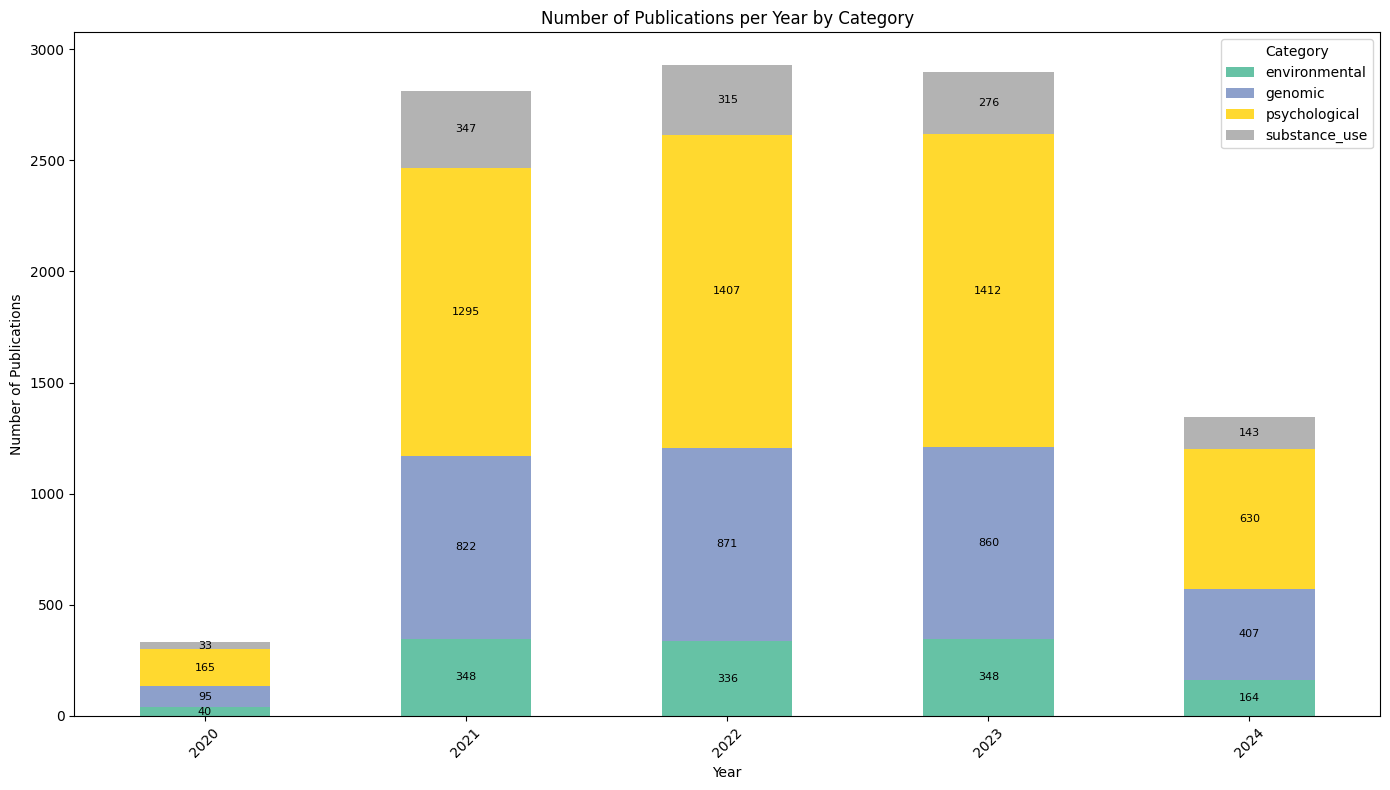

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df_expanded = df.explode('Categories')

publication_counts = df_expanded.groupby(['Year', 'Categories']).size().reset_index(name='Count')
publication_pivot = publication_counts.pivot(index='Year', columns='Categories', values='Count').fillna(0)
publication_pivot['Total'] = publication_pivot.sum(axis=1)

plt.figure(figsize=(14, 8))
ax = publication_pivot.drop(columns='Total').plot(kind='bar', stacked=True, colormap='Set2', figsize=(14, 8))
plt.title('Number of Publications per Year by Category')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

for idx, row in publication_pivot.iterrows():
    ax.annotate(f'Total: {int(row["Total"])}', (idx, row["Total"]), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

In [ ]:
nlp = spacy.load("en_ner_bionlp13cg_md")

def extract_context(df, keywords):
    """ Estrae e restituisce il contesto per le parole chiave specificate. """
    category_contexts = {category: [] for category in keywords.keys()}

    for index, row in df.iterrows():
        text = str(row['Abstract'])
        doc = nlp(text)
        for sent in doc.sents:
            for category, words in keywords.items():
                if any(word in sent.text.lower() for word in words):
                    category_contexts[category].append(sent.text)

    return category_contexts

category_contexts = extract_context(df, keywords)

for category, contexts in category_contexts.items():
    print(f"\nContext for {category}:")
    for context in contexts:
        print(f"- {context}")


In [ ]:
#summary for each category
from heapq import nlargest

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1000000

def summarize_text(texts, num_sentences=3):
    full_text = " ".join(texts)
    parts = [full_text[i:i + nlp.max_length] for i in range(0, len(full_text), nlp.max_length)]

    all_summarized_sentences = []

    for part in parts:
        doc = nlp(part)
        word_frequencies = {}
        for word in doc:
            if word.text.lower() not in STOP_WORDS and word.is_alpha:
                word_frequencies[word.text] = word_frequencies.get(word.text, 0) + 1

        max_frequency = max(word_frequencies.values(), default=1)
        for word in word_frequencies.keys():
            word_frequencies[word] /= max_frequency

        sentence_scores = {}
        for sent in doc.sents:
            for word in sent:
                if word.text in word_frequencies:
                    sentence_scores[sent] = sentence_scores.get(sent, 0) + word_frequencies[word.text]

        summarized_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
        all_summarized_sentences.extend(summarized_sentences)

    final_scores = {}
    for sent in all_summarized_sentences:
        for word in sent:
            if word.text in word_frequencies:
                final_scores[sent] = final_scores.get(sent, 0) + word_frequencies[word.text]

    final_summarized = nlargest(num_sentences, final_scores, key=final_scores.get)
    return " ".join([sent.text for sent in final_summarized])

summarized_contexts = {category: summarize_text(contexts) for category, contexts in category_contexts.items()}

for category, summary in summarized_contexts.items():
    print(f"Summary for {category}:\n{summary}\n")


In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(text, category):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

for category, contexts in category_contexts.items():
    generate_wordcloud(contexts, category)


## Causes/factors

In [ ]:
search_term = "schizophrenia[Title] AND (causes OR factors)"
id_list = search_publications(search_term)

batch_size = 200
publications2 = []

for start in range(0, len(id_list), batch_size):
    end = min(start + batch_size, len(id_list))
    batch_ids = id_list[start:end]
    records = fetch_details(batch_ids)

    for record in records['PubmedArticle']:
        try:
            pub_date = record['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']
            year = pub_date.get('Year', None)
            title = record['MedlineCitation']['Article']['ArticleTitle']
            abstract = record['MedlineCitation']['Article'].get('Abstract', {}).get('AbstractText', [''])[0]
            pub_id = record['MedlineCitation']['PMID']
            if year:
                publications2.append({'PMID': pub_id, 'Title': title, 'Year': year, 'Abstract': abstract})
        except KeyError:
            continue
    time.sleep(0.5)

df2 = pd.DataFrame(publications2)
print(df2.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       PMID                                              Title  Year  \
0  38773625  Sex-specific cortical, hippocampal and thalami...  2024   
1  38769596  Relationship between nutrition indicators and ...  2024   
2  38768696  Correlation between Toxoplasmosis and Schizoph...  2024   
3  38768577  Dysregulation of Plasma Growth Factors and Che...  2024   
4  38768123  A confounder controlled machine learning appro...  2024   

                                            Abstract  
0  The G72 mouse model of schizophrenia represent...  
1  It is reported that reduced physical activity ...  
2  Toxoplasma gondii, a parasite infecting around...  
3  Dual diagnosis in individuals with cocaine use...  
4  Resting-state functional magnetic resonance im...  


In [ ]:
text = ' '.join(df2['Title'] + ' ' + df2['Abstract'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


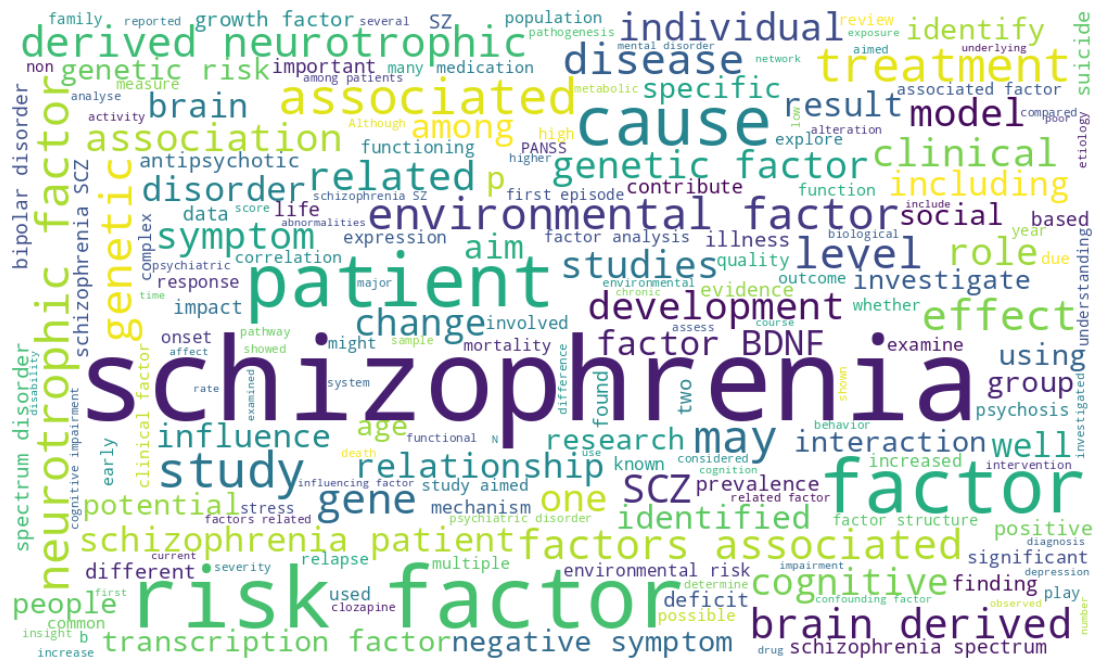

In [ ]:
keywords = ['cause', 'causes', 'factor', 'factors']

relevant_sentences = []

sentences = sent_tokenize(text)

for sentence in sentences:
    tokens = word_tokenize(sentence.lower())
    if any(keyword in tokens for keyword in keywords):
        relevant_sentences.append(sentence)

relevant_text = ' '.join(relevant_sentences)
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(relevant_text)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tokens_df2 = word_tokenize(text.lower())

stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_tokens_df2 = [word for word in tokens_df2 if word.isalnum() and word not in stop_words]

seen_words = set()

word_pairs = [(filtered_tokens_df2[i], filtered_tokens_df2[i+1]) for i in range(len(filtered_tokens_df2)-1) if filtered_tokens_df2[i] != filtered_tokens_df2[i+1] and not seen_words.add(filtered_tokens_df2[i])]
word_freq_pairs_df2 = Counter(word_pairs)

filtered_word_freq_pairs_df2 = Counter({(word1, word2): freq for (word1, word2), freq in word_freq_pairs_df2.items() if (word2, word1) not in seen_pairs and not seen_pairs.add((word1, word2))})

cooccurrences_df2 = filtered_word_freq_pairs_df2.most_common(20)

print("The 20 most common co-occurrences:")
for pair, freq in cooccurrences_df2:
    print(f"{pair}: {freq}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The 20 most common co-occurrences:
('schizophrenia', 'patients'): 2089
('healthy', 'controls'): 1382
('negative', 'symptoms'): 1311
('bipolar', 'disorder'): 1301
('schizophrenia', 'spectrum'): 976
('people', 'schizophrenia'): 941
('risk', 'factors'): 883
('individuals', 'schizophrenia'): 853
('spectrum', 'disorders'): 778
('schizophrenia', 'scz'): 748
('positive', 'negative'): 714
('schizophrenia', 'bipolar'): 697
('study', 'aimed'): 679
('prefrontal', 'cortex'): 664
('symptoms', 'schizophrenia'): 662
('95', 'ci'): 658
('cognitive', 'impairment'): 654
('cognitive', 'deficits'): 653
('gene', 'expression'): 576
('present', 'study'): 559


# Genes

In [ ]:
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving schizophrenia_genes.xls to schizophrenia_genes.xls


In [ ]:
for file_name in uploaded.keys():
    print('Il file {} è stato caricato'.format(file_name))

Il file schizophrenia_genes.xls è stato caricato


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_excel("schizophrenia_genes.xls")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gene Symbol  Gene Id                                   Gene Description  \
0         NPY     4852                                     neuropeptide Y   
1       OPRM1     4988                              opioid receptor, mu 1   
2         CRH     1392                    corticotropin releasing hormone   
3     CACNA1C      775  calcium channel, voltage-dependent, L type, al...   
4        ANK3      288             ankyrin 3, node of Ranvier (ankyrin G)   

      Disease Id Disease Code   Disease Name  \
0  umls:C0036341     C0036341  schizophrenia   
1  umls:C0036341     C0036341  schizophrenia   
2  umls:C0036341     C0036341  schizophrenia   
3  umls:C0036341     C0036341  schizophrenia   
4  umls:C0036341     C0036341  schizophrenia   

                                Psychiatric disorder  Evidence Index  \
0  Schizophrenia spectrum and other psychotic dis...             1.0   
1  Schizophrenia spectrum and other psychotic dis...             1.0   
2  Schizophrenia spectrum and other psychotic dis...             1.0   
3  Schizophrenia spectrum and other psychotic dis...             1.0   
4  Schizophrenia spectrum and other psychotic dis...             1.0   

   # Publications   Disease Id.1  # Publications Validated  Gene Id.1  \
0              15  umls:C0036341                         2       4852   
1               3  umls:C0036341                         3       4988   
2               2  umls:C0036341                         1       1392   
3              35  umls:C0036341                         4        775   
4              17  umls:C0036341                         3        288   

    Disease Id.2  # Publications Validated.1  Gene Id.2  \
0  umls:C0036341                           2       4852   
1  umls:C0036341                           3       4988   
2  umls:C0036341                           1       1392   
3  umls:C0036341                           4        775   
4  umls:C0036341                           3        288   

   # Publications Validated.2   Disease Id.3  Gene Id.3  \
0                           2  umls:C0036341       4852   
1                           3  umls:C0036341       4988   
2                           1  umls:C0036341       1392   
3                           4  umls:C0036341        775   
4                           3  umls:C0036341        288   

   # Publications Validated.3  
0                           2  
1                           3  
2                           1  
3                           4  
4                           3

In [ ]:
sorted_df = df.sort_values(by='# Publications', ascending=False)

N = 10
top_genes = sorted_df.head(N)

top_genes[['Gene Symbol', 'Gene Description', '# Publications']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gene Symbol                                   Gene Description  \
72        ERBB4                  erb-b2 receptor tyrosine kinase 4   
689      CYP2D6  cytochrome P450, family 2, subfamily D, polype...   
43     CHRFAM7A  CHRNA7 (cholinergic receptor, nicotinic, alpha...   
586      CHRNA7  cholinergic receptor, nicotinic, alpha 7 (neur...   
590      NOTCH4                                            notch 4   
3       CACNA1C  calcium channel, voltage-dependent, L type, al...   
70         TCF4                             transcription factor 4   
500      TCF7L2  transcription factor 7-like 2 (T-cell specific...   
16        HTR2C  5-hydroxytryptamine (serotonin) receptor 2C, G...   
11        HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...   

     # Publications  
72               57  
689              47  
43               43  
586              43  
590              41  
3                35  
70               35  
500              34  
16               30  
11               26

In [ ]:
def search_gene_publications(gene_symbol):
    query = f"{gene_symbol}[Title/Abstract] AND schizophrenia[Title/Abstract]"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=10000)
    results = Entrez.read(handle)
    return results["IdList"]

def fetch_abstracts(pub_ids):
    pub_info = []
    for pub_id in pub_ids:
        handle = Entrez.efetch(db="pubmed", id=pub_id, rettype="medline", retmode="text")
        records = Medline.parse(handle)
        for record in records:
            title = record.get("TI", "")
            abstract = record.get("AB", "")
            pub_info.append((pub_id, title, abstract))
    return pub_info

publications = []

for index, row in top_genes.iterrows():
    gene_symbol = row['Gene Symbol']
    gene_description = row['Gene Description']
    pub_ids = search_gene_publications(gene_symbol)
    pub_info = fetch_abstracts(pub_ids)
    publications.append({'gene_symbol': gene_symbol, 'gene_descr': gene_description, 'pub_info': pub_info})

    time.sleep(0.5)

df = pd.DataFrame(publications)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gene_symbol                                         gene_descr  \
0       ERBB4                  erb-b2 receptor tyrosine kinase 4   
1      CYP2D6  cytochrome P450, family 2, subfamily D, polype...   
2    CHRFAM7A  CHRNA7 (cholinergic receptor, nicotinic, alpha...   
3      CHRNA7  cholinergic receptor, nicotinic, alpha 7 (neur...   
4      NOTCH4                                            notch 4   
5     CACNA1C  calcium channel, voltage-dependent, L type, al...   
6        TCF4                             transcription factor 4   
7      TCF7L2  transcription factor 7-like 2 (T-cell specific...   
8       HTR2C  5-hydroxytryptamine (serotonin) receptor 2C, G...   
9       HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...   

                                            pub_info  
0  [(38657122, EGR3 Polymorphism Is a Potential S...  
1  [(38765922, The Association Between Clozapine ...  
2  [(38711941, Human restricted CHRFAM7A gene inc...  
3  [(36684422, Deepening the understanding of CNV...  
4  [(36814110, Celiac disease-associated loci sho...  
5  [(38798557, Structural characterization of a p...  
6  [(37770578, Psychiatric risk gene Transcriptio...  
7  [(36738649, Shared genetics of psychiatric dis...  
8  [(38652060, The role of psychosis and clozapin...  
9  [(38598465, Pharmacogenomics-assisted schizoph...

In [ ]:
df1 = df.explode('pub_info')
df1 = df1.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2 = pd.DataFrame(df1['pub_info'].tolist(), index=df1.index)
df2 = df2.rename(columns={0: "PID", 1: "title", 2:"abstract"})
df_gene_publ = df1[['gene_symbol', 	'gene_descr']].join(df2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_gene_publ

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gene_symbol                                         gene_descr       PID  \
0          ERBB4                  erb-b2 receptor tyrosine kinase 4  38657122   
1          ERBB4                  erb-b2 receptor tyrosine kinase 4  38396027   
2          ERBB4                  erb-b2 receptor tyrosine kinase 4  38285192   
3          ERBB4                  erb-b2 receptor tyrosine kinase 4  38114668   
4          ERBB4                  erb-b2 receptor tyrosine kinase 4  29494066   
...          ...                                                ...       ...   
1068       HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...  17192951   
1069       HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...  15469667   
1070       HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...  11163544   
1071       HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...  11134668   
1072       HTR1A  5-hydroxytryptamine (serotonin) receptor 1A, G...   1871320   

                                                  title  \
0     EGR3 Polymorphism Is a Potential Susceptibilit...   
1     nNOS in Erbb4-positive neurons regulates GABAe...   
2     Treadmill Running Regulates Adult Neurogenesis...   
3     Editorial Expression of Concern: Altered neure...   
4       Biochemistry, Epidermal Growth Factor Receptor.   
...                                                 ...   
1068  HTR2C and HTR1A gene variants in German and It...   
1069  Human 5-HT1A receptor C(-1019)G polymorphism a...   
1070  Lack of association between the T-->C 267 sero...   
1071  Pharmacogenetics and the serotonin system: ini...   
1072  Integrated genetic databases in the study of n...   

                                               abstract  
0     Objective: The purpose of this study was to ev...  
1     Neuronal nitric oxide synthase (nNOS, gene nam...  
2     Exercise can promote adult neurogenesis and im...  
3                                                        
4     The epidermal growth factor receptor (EGFR) fa...  
...                                                 ...  
1068  The serotonin 2C (HTR2C) and 1A (HTR1A) recept...  
1069  Dysfunction of the serotonin (5-HT1A) receptor...  
1070  The affinity of clozapine for 5-HT2A, 5-HT2C, ...  
1071  Serotonin (5-hydroxytryptamine, 5-HT) appears ...  
1072  1. Genetic databases are an expanding and read...  

[1073 rows x 5 columns]

In [ ]:
df_gene_publ.to_csv('df_gene_publ.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_gene_publ.gene_symbol.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gene_symbol
ERBB4       247
CYP2D6      228
CACNA1C     169
TCF4        118
CHRNA7      115
HTR2C        70
NOTCH4       57
HTR1A        35
CHRFAM7A     22
TCF7L2       12
Name: count, dtype: int64

In [ ]:
gene_top_list = df_gene_publ.gene_symbol.value_counts().nlargest(5).index.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gene_top_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ERBB4', 'CYP2D6', 'CACNA1C', 'TCF4', 'CHRNA7']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


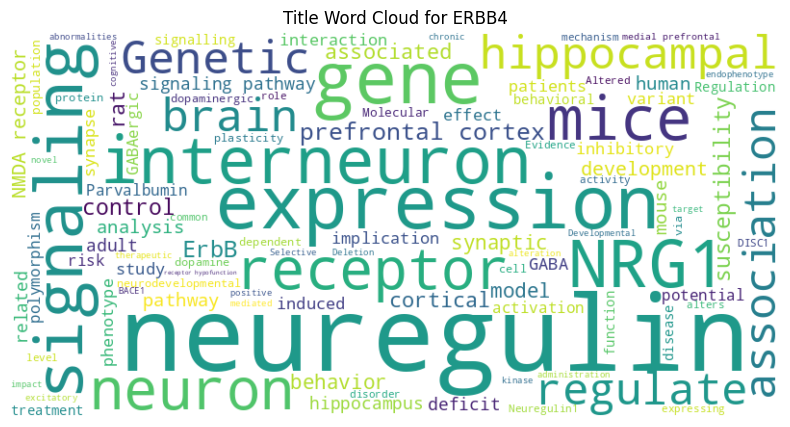

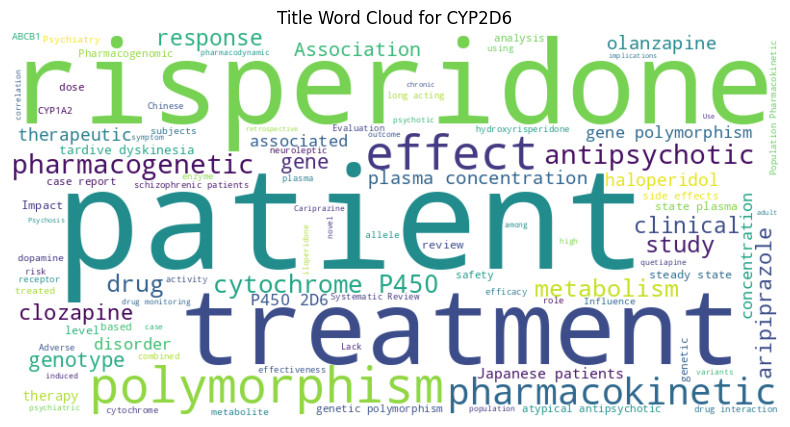

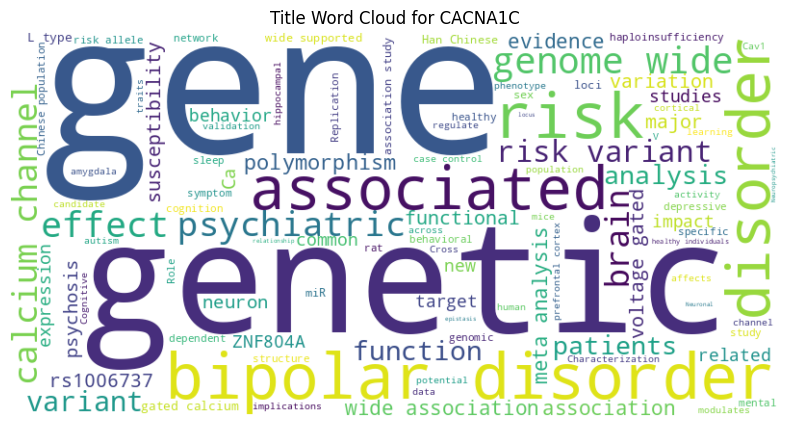

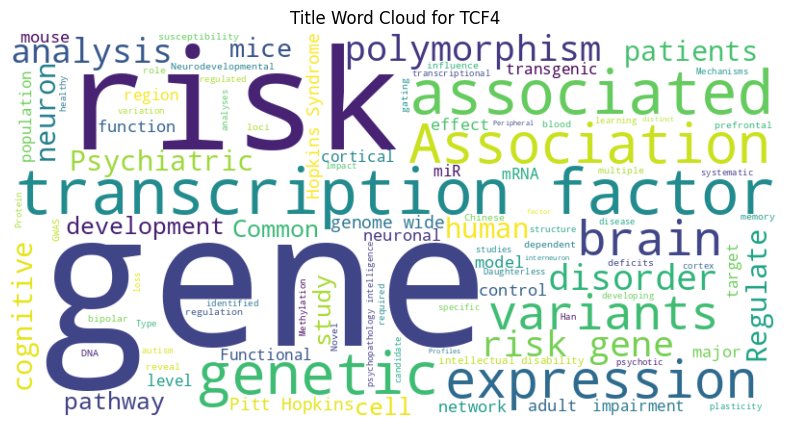

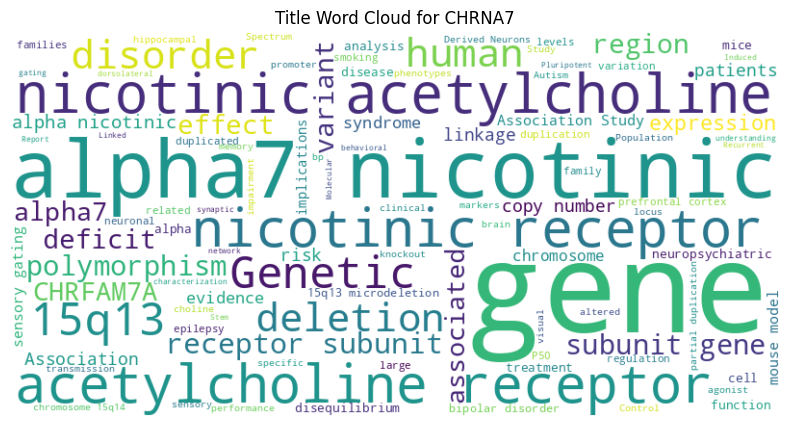

In [ ]:
# for gene in gene_top_list:
#   title_text = ' '.join(df_gene_publ[df_gene_publ.gene_symbol == gene]['title'])
#   title_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100).generate(title_text)

#   plt.figure(figsize=(10, 5))
#   plt.imshow(title_wordcloud, interpolation='bilinear')
#   plt.axis('off')
#   plt.title(f'Title Word Cloud for {gene}')
#   plt.show()




# Add "schizophrenia" to the stop words
stop_words = set(STOPWORDS)
stop_words = set(STOPWORDS)
words_to_exclude = ['schizophrenia', 'ERBB4', 'CYP2D6', 'CACNA1C', 'TCF4', 'CHRNA7']
stop_words.update(words_to_exclude)

for gene in gene_top_list:
    # Combine all titles for the given gene into one string
    title_text = ' '.join(df_gene_publ[df_gene_publ.gene_symbol == gene]['title'])

    # Generate the word cloud
    title_wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=stop_words, max_words=100
    ).generate(title_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(title_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Title Word Cloud for {gene}')
    plt.show()

In [ ]:
def fetch_abstracts(pub_ids):
    handle = Entrez.efetch(db="pubmed", id=pub_ids, rettype="medline", retmode="text")
    records = Medline.parse(handle)
    abstracts = []
    for record in records:
        abstract = record.get("AB", "")
        abstracts.append(abstract)
    return abstracts

# Per ogni gene, ricerca le pubblicazioni e stampa gli abstract
for gene_symbol in top_genes:
    pub_ids = search_publications(gene_symbol)
    abstracts = fetch_abstracts(pub_ids)
    print(f"Abstracts per {gene_symbol}:")
    for abstract in abstracts:
        print(abstract)
    print("\n")

Abstracts per ERBB4:
Autism spectrum disorder (ASD) is a neurodevelopmental disorder, characterized by social communication disability and stereotypic behavior. This study aims to investigate the impact of prenatal exposure to 1-nitropyrene (1-NP), a key component of motor vehicle exhaust, on autism-like behaviors in a mouse model. Three-chamber test finds that prenatal 1-NP exposure causes autism-like behaviors during the weaning period. Patch clamp shows that inhibitory synaptic transmission is reduced in medial prefrontal cortex of 1-NP-exposed weaning pups. Immunofluorescence finds that prenatal 1-NP exposure reduces the number of prefrontal glutamate decarboxylase 67 (GAD67) positive interneurons in fetuses and weaning pups. Moreover, prenatal 1-NP exposure retards tangential migration of GAD67-positive interneurons and downregulates interneuron migration-related genes, such as Nrg1, Erbb4, and Sema3F, in fetal forebrain. Mechanistically, prenatal 1-NP exposure reduces hydroxymeth

# KEGG querying

Let us take top 5 genes mantioned in the publication and do the exploration using the Kegg db

In [ ]:
def fetch_gene_info(gene_list, org_code = 'hsa'):
    gene_info_list = []
    for gene in gene_list:
        gene_id = org_code + ':' + gene
        request = REST.kegg_get(gene_id)
        records = Gene.parse(request)
        record = list(records)[0]
        orthology = record.orthology[0][0]
        gene_info_list.append({'gene_id': gene_id, 'orthology_code': orthology, **record.__dict__})
    return pd.DataFrame(gene_info_list)

gene_list = ['ERBB4', 'CYP2D6', 'CACNA1C', 'TCF4', 'CHRNA7']

gene_info_df = fetch_gene_info(gene_list)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gene_info_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gene_id orthology_code      entry  \
0    hsa:ERBB4         K05085       2066   
1   hsa:CYP2D6         K17712  107987479   
2  hsa:CACNA1C         K04850        775   
3     hsa:TCF4         K15603       6925   
4   hsa:CHRNA7         K04809       1139   

                                                name definition  \
0       [(RefSeq) erb-b2 receptor tyrosine kinase 4]              
1                     [(RefSeq) cytochrome P450 2D6]              
2  [(RefSeq) calcium voltage-gated channel subuni...              
3                  [(RefSeq) transcription factor 4]              
4  [(RefSeq) cholinergic receptor nicotinic alpha...              

                                           orthology  \
0  [(K05085, receptor tyrosine-protein kinase erb...   
1  [(K17712, cytochrome P450 family 2 subfamily D...   
2  [(K04850, voltage-dependent calcium channel L ...   
3              [(K15603, transcription factor 4/12)]   
4  [(K04809, nicotinic acetylcholine receptor alp...   

                      organism                            position  \
0  (hsa, Homo sapiens (human))  2:complement(211375717..212538802)   
1  (hsa, Homo sapiens (human))                                  22   
2  (hsa, Homo sapiens (human))                 12:1970780..2697950   
3  (hsa, Homo sapiens (human))   18:complement(55222185..55635957)   
4  (hsa, Homo sapiens (human))               15:32030483..32173018   

                                               motif  \
0  [(Pfam, [PK_Tyr_Ser-Thr, Recep_L_domain, GF_re...   
1                                   [(Pfam, [p450])]   
2  [(Pfam, [Ion_trans, Ca_chan_IQ, GPHH, CAC1F_C,...   
3                                    [(Pfam, [HLH])]   
4  [(Pfam, [Neur_chan_LBD, Neur_chan_memb, SUR7, ...   

                                             dblinks  
0  [(NCBI-GeneID, [2066]), (NCBI-ProteinID, [NP_0...  
1  [(NCBI-GeneID, [107987479]), (NCBI-ProteinID, ...  
2  [(NCBI-GeneID, [775]), (NCBI-ProteinID, [NP_95...  
3  [(NCBI-GeneID, [6925]), (NCBI-ProteinID, [NP_0...  
4  [(NCBI-GeneID, [1139]), (NCBI-ProteinID, [NP_0...

In [ ]:
def parse_kegg_data(data_str):
    # Split the input string into lines
    content = data_str.splitlines()

    data = {}
    current_field = None

    for line in content:
        if line.strip() == "":
            continue

        # Check if the line starts with an uppercase word
        if line[:1].isupper():
            parts = line.split(maxsplit=1)
            if len(parts) > 1:
                field, value = parts
                data[field] = value.strip()
                current_field = field
            else:
                current_field = parts[0]
                data[current_field] = ""
        else:
            # If the line doesn't start with an uppercase word, it's a continuation of the previous field
            if current_field and current_field in data:
                data[current_field] += " " + line.strip()

    return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
parsed_data_list = []
for index, row in gene_info_df.iterrows():
  orthology_info = REST.kegg_get(row['orthology_code']).read()
  parsed_data = parse_kegg_data(orthology_info)
  parsed_data_list.append(parsed_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame(parsed_data_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ENTRY           SYMBOL  \
0  K05085                      KO      ERBB4, HER4   
1  K17712                      KO           CYP2D6   
2  K04850                      KO  CACNA1C, CAV1.2   
3  K15603                      KO          TCF4_12   
4  K04809                      KO           CHRNA7   

                                                NAME  \
0  receptor tyrosine-protein kinase erbB-4 [EC:2....   
1  cytochrome P450 family 2 subfamily D6 [EC:1.14...   
2  voltage-dependent calcium channel L type alpha-1C   
3                          transcription factor 4/12   
4           nicotinic acetylcholine receptor alpha-7   

                                             PATHWAY  \
0  map04010  MAPK signaling pathway map04012  Erb...   
1  map00980  Metabolism of xenobiotics by cytochr...   
2  map04010  MAPK signaling pathway map04020  Cal...   
3                                                NaN   
4  map04020  Calcium signaling pathway map04080  ...   

                                             DISEASE  \
0        H00058  Amyotrophic lateral sclerosis (ALS)   
1                       H01171  Poor drug metabolism   
2  H00720  Long QT syndrome H00728  Brugada syndr...   
3  H00255  Hypogonadotropic hypogonadism H00756  ...   
4  H01877  Chromosome 15q13.3 microdeletion syndrome   

                                               BRITE  \
0  KEGG Orthology (KO) [BR:ko00001] 09130 Environ...   
1  KEGG Orthology (KO) [BR:ko00001] 09100 Metabol...   
2  KEGG Orthology (KO) [BR:ko00001] 09130 Environ...   
3  KEGG Orthology (KO) [BR:ko00001] 09180 Brite H...   
4  KEGG Orthology (KO) [BR:ko00001] 09130 Environ...   

                                               GENES  \
0  HSA: 2066(ERBB4) PTR: 459919(ERBB4) PPS: 10099...   
1  HSA: 107987478 107987479(CYP2D6) 1564(CYP2D7) ...   
2  HSA: 775(CACNA1C) PTR: 466915(CACNA1C) PPS: 10...   
3  HSA: 6925(TCF4) 6938(TCF12) PTR: 453466(TCF12)...   
4  HSA: 1139(CHRNA7) 89832(CHRFAM7A) PTR: 467639(...   

                                           REFERENCE  \
0  PMID:16829981 AUTHORS   Citri A, Yarden Y. TIT...   
1  PMID:9056237 (CYP2D19) AUTHORS   Igarashi T, S...   
2  PMID:1316612 AUTHORS   Soldatov NM TITLE     M...   
3  PMID:17143293 AUTHORS   Arce L, Yokoyama NN, W...   
4  PMID:24362025 AUTHORS   Papke RL, Horenstein N...   

                                           REACTION  \
0                                               NaN   
1  R03697 R08267 R08270 R08343 R08344 R08345 R09421   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                 DBLINKS  
0                                    NaN  
1                                    NaN  
2  GO: 0005245 TC: 1.A.1.11.4 1.A.1.11.6  
3                                    NaN  
4        GO: 0004889 0015464 TC: 1.A.9.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.PATHWAY.loc[0]

'map04010  MAPK signaling pathway map04012  ErbB signaling pathway map04020  Calcium signaling pathway map04151  PI3K-Akt signaling pathway map05014  Amyotrophic lateral sclerosis map05205  Proteoglycans in cancer'

In [ ]:
def extractRegexFromItem(item, regex):
    sItem = pd.Series(data=item)
    if sItem.empty == False:
        dfItem = sItem.str.extractall(regex)
    else:
        dfItem = []
    return dfItem

dfMatches = extractRegexFromItem(df.PATHWAY.loc[0], r"([a-z0-9]+)")
lPaths = list(dfMatches[0])
# print('All matches:\n', lPaths, '\n')
lPaths = [el for el in lPaths if el.startswith('map')]
print('List of pathway IDs:\n', lPaths)

List of pathway IDs:
 ['map04010', 'map04012', 'map04020', 'map04151', 'map05014', 'map05205']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfMatches = extractRegexFromItem(df.PATHWAY.loc[1], r"([a-z0-9]+)")
lPaths = list(dfMatches[0])
# print('All matches:\n', lPaths, '\n')
lPaths = [el for el in lPaths if el.startswith('map')]
print('List of pathway IDs:\n', lPaths)

List of pathway IDs:
 ['map00980', 'map00982', 'map01522', 'map04726']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfMatches = extractRegexFromItem(df.PATHWAY.loc[2], r"([a-z0-9]+)")
lPaths = list(dfMatches[0])
# print('All matches:\n', lPaths, '\n')
lPaths = [el for el in lPaths if el.startswith('map')]
print('List of pathway IDs:\n', lPaths)

List of pathway IDs:
 ['map04010', 'map04020', 'map04022', 'map04024', 'map04260', 'map04261', 'map04270', 'map04713', 'map04720', 'map04723', 'map04724', 'map04725', 'map04726', 'map04727', 'map04728', 'map04742', 'map04911', 'map04912', 'map04921', 'map04924', 'map04925', 'map04927', 'map04929', 'map04930', 'map04934', 'map04935', 'map05010', 'map05020', 'map05022', 'map05031', 'map05207', 'map05410', 'map05412', 'map05414']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfMatches = extractRegexFromItem(df.PATHWAY.loc[4], r"([a-z0-9]+)")
lPaths = list(dfMatches[0])
# print('All matches:\n', lPaths, '\n')
lPaths = [el for el in lPaths if el.startswith('map')]
print('List of pathway IDs:\n', lPaths)

List of pathway IDs:
 ['map04020', 'map04080', 'map04725', 'map05010', 'map05022', 'map05033', 'map05207']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here we would like to use the extracted pathway to draw the maps

In [ ]:
from Bio.KEGG.KGML import KGML_parser
from Bio.KEGG.REST import *
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.KEGG.KGML import KGML_pathway

def downloadKGMLfile(pathId):
    kgmlMap = (kegg_get(pathId, "kgml").read())
    # print(kgmlMap)
    with open(pathId +'.kgml', 'w') as f:
        for m in kgmlMap:
            f.write(m)

geneID = 'hsa:ERBB4'
for path in lPaths:
  print(path)
  mapID = 'hsa' + str(path[3:])
  # print(mapID)
  try:
      downloadKGMLfile(mapID)
      pMap = KGML_parser.read(kegg_get(mapID, "kgml"))
      # print(pMap)
      for g in pMap.genes:
          lsName = g.name.split()
          if geneID in lsName:
              for gg in g.graphics:
                  gg.fgcolor = '#ff0000'
                  gg.bgcolor = '#ff0000'

      kgml_map = KGMLCanvas(pMap, show_maps=True, import_imagemap = True)
      kgml_map.draw(mapID + ".pdf")
  except:
      'No map specific for this organism'

map04010
hsa04010
map04012
hsa04012
map04020
hsa04020
map04151
hsa04151
map05014
hsa05014
map05205
hsa05205


In [ ]:
pip install rlextra -i https://www.reportlab.com/pypi

Looking in indexes: https://www.reportlab.com/pypi
User for www.reportlab.com: 6741017@gmail.com
Password: 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.4/426.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.0/913.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 13.6 MB/s eta 0:00:00
  Created wheel for Pmw-py3: filename=Pmw_py3-2.1-py3-none-any.whl size=546344 sha256=db4d65df9ea1caa3effa15a7460c5f9bd245d405dae0e38bd9d86698954a7fc9
  Stored in directory: /root/.cache/pip/wheels/f9/03/f4/e837d6a409c22c1dfc6699361e392eac15a9e5bbccae6ab59a
  Created wheel for svglib: filename=svglib-1.4.1-py3-none-any.wh

### Other species genes we work on

The idea is to see what other species have the genes we're looking at and to which class these organisms belong.

We found out that all the genes that we chose for research are in animal class.

In [ ]:
df.GENES.loc[1]

'HSA: 107987478 107987479(CYP2D6) 1564(CYP2D7) 1565(CYP2D6) PTR: 112206755 470228(CYP2D6) PPS: 100969627 100988273 GGO: 101142890 109025371 115931944 PON: 100452833 100453198 100458527 NLE: 100580051 100593769 100606221 MCC: 100424965 678691(CYP2D6) MCF: 102140079(CYP2D8) 102143092(CYP2D6) MTHB: 126963595 126963596 MNI: 105464350 105464352 CSAB: 103223410 103223412 CATY: 105572143 105573227 PANU: 101014319 101014919 TGE: 112632623 112632624 MLEU: 105538801 105539005 RRO: 104670080 104670158 RBB: 108543556 108543567 TFN: 117096386 117096388 PTEH: 111548933 111548934 CANG: 105514021 105514022 CJC: 100385343(CYP2D19) 100415600 SBQ: 101049800 101050356 CIMI: 108290468(CYP2D6) 108290469(CYP2D8) CSYR: 103264338 103264339 103264340 103264341 103264342 103264346 103264347 MMUR: 105858587 105858588 LCAT: 123640281 123640282 123640283 PCOQ: 105805151 OGA: 100946358 105886367 CCAN: 109689341 109689343 109689344 DORD: 105992056 OPI: 101534880 GVR: 103591840 DNM: 101415786 101440010 GAS: 123250293'